In [1]:
%autosave 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv("resources/heart-disease.csv")

# Prepare data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instatiate the model
clf = RandomForestClassifier();

# Fit the model
clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs_positive = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

Autosaving every 1 seconds


## Confusion Matrix

A confusion matrix is a quick way to compare lables a model predicts and the actual labels it was supposed to predict.


In essence, giving you an idea of where the model is getting confused.

![confusion-matrix](resources/confusion-matrix.png)

In [2]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 4, 28]], dtype=int64)

### Visualize confusion matrix with pd.crosstab()

In [3]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,4,28


### Importing library from within Jupyter Notebook

In [7]:
import sys

!conda install seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



### Make our confusion matrix more visual by using Seaborn's heatmap()

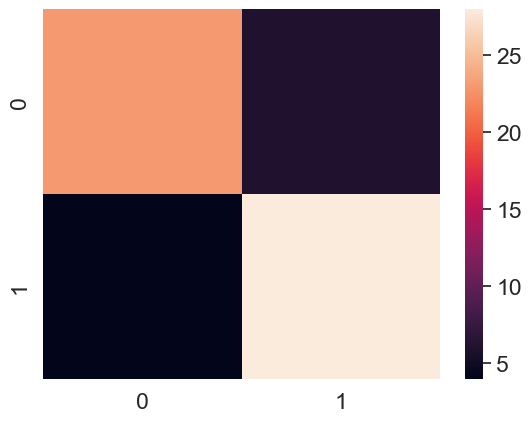

In [5]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);